In [90]:
# Imports
import matplotlib.pyplot   as plt
import numpy               as np
import numpy.random        as rd
import scipy.linalg        as la

from sklearn.metrics       import confusion_matrix
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.decomposition import PCA

import pickle as p


In [91]:
D = p.load(open('../../MNISTsmall.p', 'rb'))
X  = D['X'] * 1.0 # Float
y  = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:, f1]
X2 = X[:, f2]
y1, y2 = y[f1], y[f2]

### Exercício 1 - Considere os 383 primeiros exemplos do conjunto de teste do dígito “4”.

In [92]:
X2_dig4 = X2[:, y2==4]      # Digitos 4...
X2_dig4 = X2_dig4[:, :383]  # 383 primeiros
print(X2_dig4.shape)

(784, 383)


#### (a) Considere que se estima a matriz de covariancia deste conjunto.

In [93]:
#Covarinacia de X2_dig4
Cx = np.cov(X2_dig4)*1.
print("Convariancia: ", Cx)

Convariancia:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
print('i)  A dimensao da matriz é 784 × 784: ', Cx.shape)
print('ii) O determinante da matriz de convariancia não é igual a 0: ', la.det(Cx))
# RESPOSTA i)

i)  A dimensao da matriz é 784 × 784:  (784, 784)
ii) O determinante da matriz de convariancia não é igual a 0:  0.0


#### (b) Para esta alínea, arredonde os valores pedidos a 0 casas decimais.

In [95]:
print('i)  A norma do vetor de média dos dados é 780:     ', np.round(la.norm(np.mean(X2_dig4, axis=1))))
print('ii) O desvio padrao da dimensão 215 dos dados é 106: ', np.round(np.std(X2_dig4,axis=1))[214])
#RESPOSTA ii)

i)  A norma do vetor de média dos dados é 780:      1561.0
ii) O desvio padrao da dimensão 215 dos dados é 106:  106.0


#### (c) Para esta alínea arredonde os valores pedidos a 0 casas decimais. Considere o 22º dígito da matriz de dados. Pretende-se projetar e reconstruir este dígito usando um número mínimo de componentes principais tal que os dados projetados tenham 56% da variância total dos dados originais. O erro absoluto médio entre o dígito original e o reconstruido e:

i) 20 <br>
ii) 37 <br>
iii) 24 <br>
iv) 11

In [96]:
dig22 = X2_dig4[:, 21]

# Obter pela covariância os valores e vetores próprios dos dados de treino
Cx   = np.cov(X2_dig4)
u, V = la.eig(Cx)
u, V = u.real, V.real
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

# Guardar só as referidas componentes na matriz de transformação W
un = u/np.sum(u)
uc = np.cumsum(un)
cond = np.sum(uc <= .56)
W = V[:, :cond]

dig22p = np.dot(W.T,dig22)     # Dados projetados
dig22r = np.dot(W,dig22p)      # Dados reconstruidos

print('Erro Absoluto Médio: ', np.round(np.mean(np.abs(dig22r - dig22))))
#RESPOSTA i

Erro Absoluto Médio:  20.0


#### (d) Pretende-se visualizar os digitos deste conjunto e os vetores prorpios da matriz de covariancia dos dados

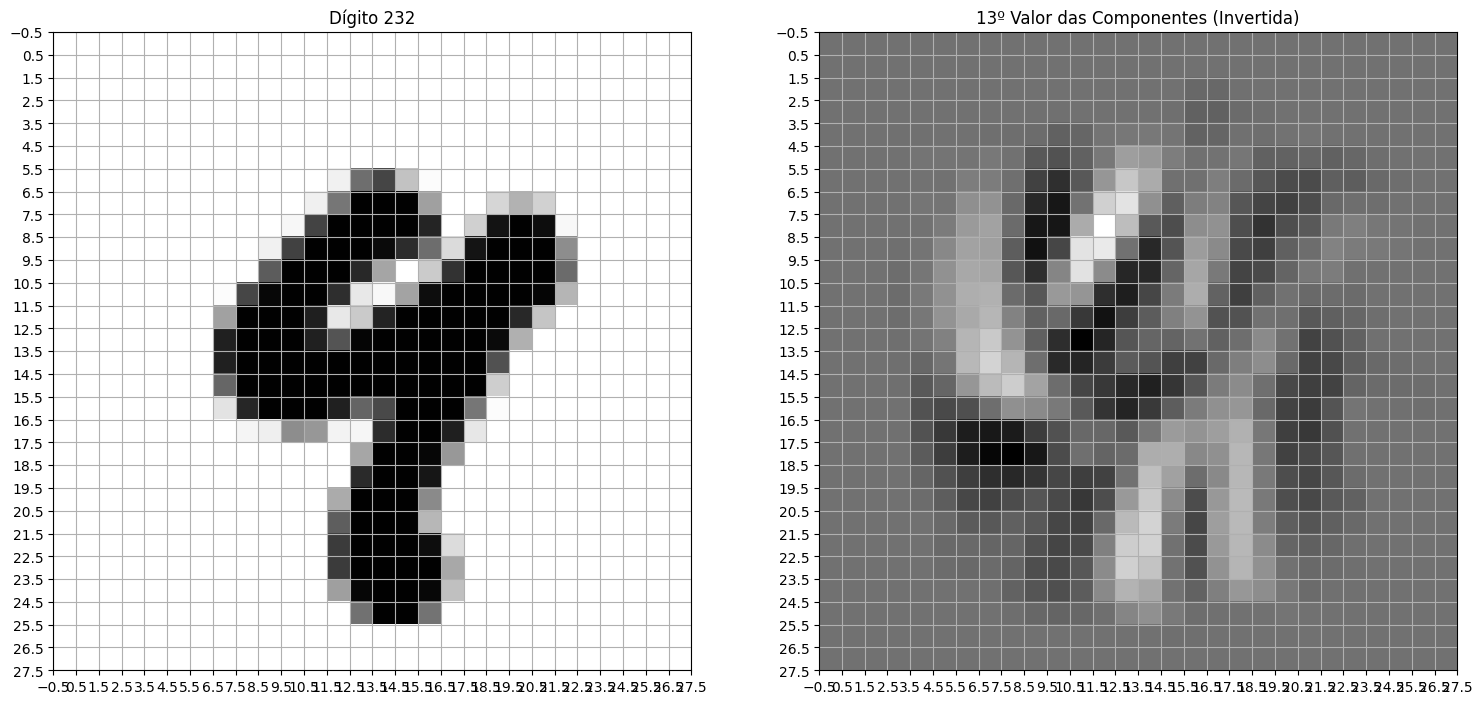

In [97]:
plt.figure(figsize=(28,28))
plt.subplot(131)
plt.imshow(255-X2_dig4[:,231].reshape((28, 28)), interpolation='none',cmap='gray') 
plt.title('Dígito 232')
plt.xticks(np.arange(-0.5, 27.7))
plt.yticks(np.arange(-0.5, 27.7))
plt.grid()
plt.subplot(132)

plt.imshow(V[:,12].reshape((28, 28)), interpolation='none',cmap='binary') 
plt.title('13º Valor das Componentes (Invertida)')
plt.xticks(np.arange(-0.5, 27.7))
plt.yticks(np.arange(-0.5, 27.7))
plt.grid()
plt.show()

#RESPOSTA i)

#### e) Considere o 234º dígito da matriz de dados. Considere ainda que se pretende projetar e reconstruir este dígito usando as 33 primeiras componentes principais. O erro quadratico médio entre o dígito original e o reconstruido e (arredondando a 0 casas decimais):

i) 487 <br>
ii) 387 <br>
iii) 736 <br>
iv) 536

In [98]:
dig234 = X2_dig4[:, 233]
# Guardar só as referidas componentes na matriz de transformação W
W = V[:, :33]
dig234p = np.dot(W.T,dig234)     # Dados projetados
dig234r = np.dot(W,dig234p)      # Dados reconstruidos 

print('Erro Quadrático Médio: ', np.round(np.mean((dig234-dig234r)**2)))
#Resposta iv)

Erro Quadrático Médio:  536.0


#### (f) O numero de pixeis com valor igual a zero para todos os exemplos deste conjunto é:

i) 298 <br>
ii) 333 <br>
iii) 272 <br>
iv) 221

In [99]:
num_zeros = np.sum(np.diag(Cx)==0)
print('Número de píxeis iguais a zero:', num_zeros)
#Resposta iii)

Número de píxeis iguais a zero: 272


#### (g) Pretende-se projetar os dígitos nas suas componentes principais. O numero mínimo de componentes principias para que os dados projetados tenham acima de 75% da variancia total dos dados originais, é:

i) 22 <br>
ii) 26 <br>
iii) 24 <br>
iv) 16

In [100]:
pca = PCA(n_components = .75, svd_solver = 'full').fit(X2_dig4.T)
print('Valores próprios para 75%: ', pca.n_components_)
#Resposta i)

Valores próprios para 75%:  22


#### (h) O numero de valores próprios superiores a $10^-10$ da matriz de covariancia dos dados é:

i. 309 <br>
ii. 382 <br>
iii. 194 <br>
iv. 397


In [101]:
print("Número de valores superiores a 10^-10: ",np.sum(u>(10e-10)))
# Alínea ii)

Número de valores superiores a 10^-10:  382


#### (i) Para esta alínea, arredonde os valores pedidos a 2 casas decimais.


In [102]:
print('i)  Existem 256 dimensões dos dados que não variam: ' , np.round(np.sum(np.diag(Cx)==0),2))
print('ii) O coeficiente de correlação entre a dimensão 401 e 432 é 0.00: ', np.round(np.corrcoef(X2_dig4)[400, 431], 2))
# Alínea iv)

i)  Existem 256 dimensões dos dados que não variam:  272
ii) O coeficiente de correlação entre a dimensão 401 e 432 é 0.00:  0.12


c:\Users\Vera Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Vera Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


#### (j) Para esta alínea, arredonde os valores pedidos a 0 casas decimais. Considere que os 96º, 141º, 208º e 359º dígitos são representados pelos vetores x1, x2, x3, e x4.


In [103]:
x1 = X2_dig4[:, 95]
x2 = X2_dig4[:, 140]
x3 = X2_dig4[:, 207]
x4 = X2_dig4[:, 358]

In [104]:
print('i)  O produto interno entre os vetores x1 e x2 é 1679359: ', np.round(np.dot(x1, x2),0))
print('ii) O produto interno entre os vetores x3 e x4 é 2350014: ', np.round(np.dot(x3, x4),0))
#Resposta ii)

i)  O produto interno entre os vetores x1 e x2 é 1679359:  3112806.0
ii) O produto interno entre os vetores x3 e x4 é 2350014:  2350014.0


# RESPOSTAS

In [105]:
QuestDic=p.load(open('A46484_Ficha3_Respostas.p','rb'))
print(QuestDic['nome'])
print(QuestDic['numero'])

QuestDic['Q001'][0,:]=np.array([0,0,1,0]) # a) iii
QuestDic['Q001'][1,:]=np.array([0,1,0,0]) # b) ii
QuestDic['Q001'][2,:]=np.array([1,0,0,0]) # c) i
QuestDic['Q001'][3,:]=np.array([1,0,0,0]) # d) i
QuestDic['Q001'][4,:]=np.array([0,0,0,1]) # e) iv
QuestDic['Q001'][5,:]=np.array([0,0,1,0]) # f) iii
QuestDic['Q001'][6,:]=np.array([1,0,0,0]) # g) i
QuestDic['Q001'][7,:]=np.array([0,1,0,0]) # h) ii
QuestDic['Q001'][8,:]=np.array([0,0,0,1]) # i) iv
QuestDic['Q001'][9,:]=np.array([0,1,0,0]) # j) ii
p.dump(QuestDic,open('A46484_Ficha3_Respostas.p','wb'))


Duarte Alexandre Pedro Gonçalves
A46484


In [106]:
QuestDic['Q001']

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])